In [8]:
import matplotlib.pyplot as plt
import numpy as np

This function makes nice $\LaTeX$ labels for different final states

In [9]:
def get_tex_label(fs):
    tex_label = r"$"+ fs
    tex_label = tex_label.replace("pi0", "\pi^0")
    tex_label = tex_label.replace("pi pi", "\pi^+ \pi^-")
    tex_label = tex_label.replace("mu mu", "\mu^+ \mu^-")
    tex_label = tex_label.replace("g", "\gamma")
    tex_label = tex_label.replace("e e", "e^+ e^-")
    return tex_label + r"$"

def get_color(fs):
#     fss = sorted(list(set(ScalarMediator.list_final_states() + VectorMediator.list_final_states())))
    fss = ["pi0 pi0", "pi pi", "mu mu", "e e", "pi0 g", "g g", "pi0 pi pi", "s s", "v v"]
    return list(plt.rcParams["axes.prop_cycle"])[fss.index(fs)]["color"]

These imports give access to COMPTEL's energy resolution and a function to convolve a spectrum with a detector's smearing function. We will use these to understand how lines contribute to the spectrum for this model.

In [10]:
from hazma.gamma_ray_limits.gamma_ray_limit_parameters import energy_res_comptel
from hazma.gamma_ray_limits.compute_limits import get_detected_spectrum

# Scalar mediator

This import loads the scalar mediator class from hazma.

In [11]:
from hazma.scalar_mediator import ScalarMediator
from hazma.vector_mediator import VectorMediator

## Spectra's dependence on $m_\chi$
This section examines the dependence of the vector theory's spectra on the dark matter mass since changing the couplings is less interesting.

Create a `ScalarMediator` object. The values of couplings to leptons and the strange quark and well as $m_S$ are irrelevant to our focus. The initial value of $m_\chi$ does not matter since it will shortly be changed. The velocity dispersion in the Milky Way $v_\chi \sim 10^{-3}$ is defined here and will be used to set the DM center of mass energy.

In [12]:
sm_args = {"mx": 250., "ms": 1000., "gsxx": 1., "gsff": 1., "gsGG": 1., "gsFF": 1.}
sm = ScalarMediator(**sm_args)

vx_mw = 1.0e-3  # approximate Milky Way velocity dispersion

Choose arrays of photon energies and DM masses. The DM mass array has the same shape as the array of subplots we want to generate.

In [13]:
e_gam_min, e_gam_max, n_e_gams = 5., 300., 250
e_gams = np.logspace(np.log10(e_gam_min), np.log10(e_gam_max), n_e_gams)

n_subplot_rows, n_subplot_cols = 2, 2
mxs = np.array([100., 110., 140., 250.]).reshape((n_subplot_rows, n_subplot_cols))

Iterate over the array of dark matter masses, computing the spectrum at each $E_\gamma \in$ `e_gams`. Most of the code below formats the plot nicely; the `spectra()` function is called in line 12.

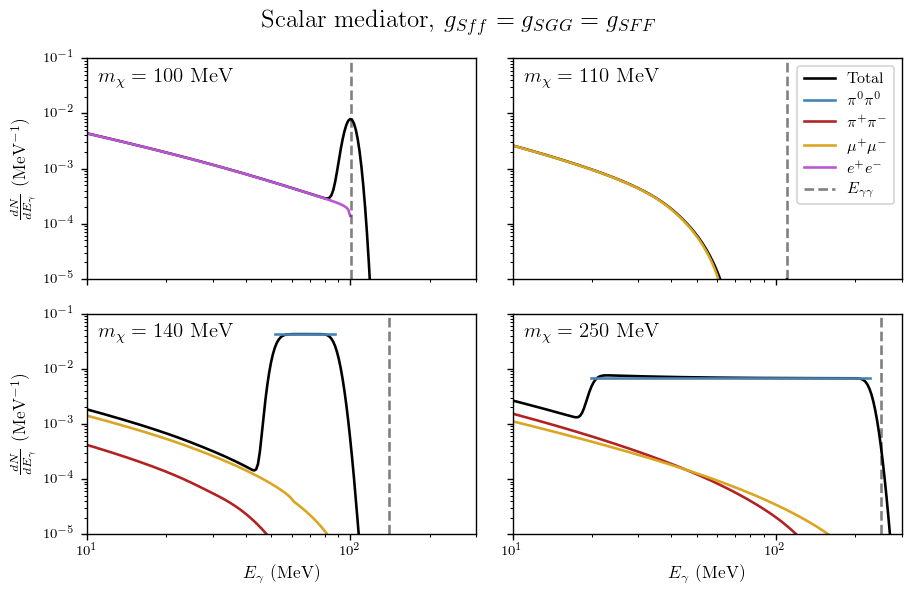

In [14]:
plt.figure(figsize=(7.5, 5))

# Iterate over the values, row and column indices of mxs
it = np.nditer(mxs, flags=['multi_index'])

while not it.finished:
    sm.mx = it[0]  # current value of mx
    idx = it.iterindex  # current index in mxs
    row_idx, col_idx = it.multi_index  # current row and column indices
    plt.subplot(n_subplot_rows, n_subplot_cols, idx + 1)
    
    # Center of mass energy, set to slightly above threshold
    e_cm = 2.*sm.mx * (1. + 0.5 * vx_mw)

    # Plot total convolved spectrum
    dnde_det = get_detected_spectrum(lambda es, e_cm: sm.spectra(es, e_cm)["total"],
                                     sm.gamma_ray_lines,
                                     e_gam_min, e_gam_max,
                                     e_cm,
                                     energy_res=energy_res_comptel)
    plt.loglog(e_gams, dnde_det(e_gams), "black", label="Total")
    
    # Plot individual channels' spectra
    for fs, spec in reversed(sorted(sm.spectra(e_gams, e_cm).iteritems())):
        if fs not in ["total", "s s", "g g"]:
            plt.loglog(e_gams, spec, label=get_tex_label(fs),
                       color=get_color(fs),
                       linewidth=1.5)

    # Mark the lines' energies
    for ch, line in sm.gamma_ray_lines(e_cm).iteritems():
        plt.axvline(line["energy"], linestyle='--', color="k", alpha=0.5, linewidth=1.5, label=r"$E_{\gamma\gamma}$")

    ### Formatting
    # Set axis limits
    plt.xlim(10, 300)
    plt.ylim(1e-5, 1e-1)
        
    # Only draw the legend for the first subplot
    if idx == 1:
        plt.legend()
        
    # Only show ticks and axis labels for subplots on the left and bottom
    if row_idx != n_subplot_rows - 1:
        plt.tick_params(labelbottom="off")
    else:
        plt.xlabel(r"$E_\gamma$ (MeV)")
    if col_idx % n_subplot_cols != 0:
        plt.tick_params(labelleft="off")
    else:
        plt.ylabel(r"$\frac{dN}{dE_\gamma}$ (MeV$^{-1}$)")
        
    # Label subplot with dark matter mass
    plt.text(1.1e1, 3.3e-2, r"$m_\chi = %0.f$ MeV" % sm.mx)
    
    it.iternext()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # remove some of the space between plots
plt.suptitle(r"Scalar mediator, $g_{Sff} = g_{SGG} = g_{SFF}$")

plt.savefig("figures/scalar_spectra_higgs_portal.pdf")

## Dependence on couplings

In [ ]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [ ]:
sm_args = {"mx": 250., "ms": 1000., "gsxx": 1., "gsff": 1., "gsGG": 1., "gsFF": 1.}
sm = ScalarMediator(**sm_args)

vx_mw = 1.0e-3  # approximate Milky Way velocity dispersion

In [ ]:
e_gam_min, e_gam_max, n_e_gams = 5., 300., 250
e_gams = np.logspace(np.log10(e_gam_min), np.log10(e_gam_max), n_e_gams)

In [ ]:
n_subplot_rows, n_subplot_cols = 2, 2
mxs = np.array([100., 110., 140., 250.]).reshape((n_subplot_rows, n_subplot_cols))

ratios = np.array([-1.5, 1000.])

In [ ]:
# Set up the colormap
cmap = cm.viridis_r
norm = Normalize(vmin=ratios[0], vmax=ratios[-1])
m = cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array(ratios)

In [ ]:
# Compute the spectra!
spectra_det_sm = {}

for mx in mxs.flatten():
    sm.mx = mx  # current value of mx
    # Center of mass energy, set to slightly above threshold
    e_cm = 2.*sm.mx * (1. + 0.5 * vx_mw)
    
    for ratio in ratios:
        sm.gsGG = ratio * sm.gsff
        spec = sm.spectra(e_gams, e_cm)["total"]
        spectra_det_sm[(mx, ratio)] = spec
#         dnde_det = get_detected_spectrum(e_gams, spec,
#                                          *sm.gamma_ray_lines(e_cm),
#                                          energy_res=energy_res_comptel)

#         spectra_det[(mx, ratio)] = dnde_det(e_gams)

In [ ]:
fig, axes = plt.subplots(nrows=n_subplot_rows, ncols=n_subplot_cols, figsize=(7.5, 5), sharex=True, sharey=True)

# Iterate over the values, row and column indices of mxs
it = np.nditer(mxs, flags=['multi_index'])

while not it.finished:
    idx = it.iterindex  # current index in mxs
    row_idx, col_idx = it.multi_index  # current row and column indices
    ax = axes[row_idx, col_idx]
    
    for ratio in ratios:
        ax.loglog(e_gams, spectra_det_sm[(float(it[0]), ratio)], color=m.to_rgba(ratio), linewidth=1)
    
    ### Formatting
    # Set axis limits
    plt.xlim(10, 250)
    plt.ylim(6e-7, 1e0)

    # Only show ticks and axis labels for subplots on the left and bottom
    if row_idx != n_subplot_rows - 1:
        ax.tick_params(labelbottom="off")
    else:
        ax.set_xlabel(r"$E_\gamma$ (MeV)")
    if col_idx % n_subplot_cols != 0:
        ax.tick_params(labelleft="off")
    else:
        ax.set_ylabel(r"$\frac{dN}{dE_\gamma}$ (MeV$^{-1}$)")
        
    # Label subplot with dark matter mass
    if (row_idx, col_idx) == (0, 0):
        ax.text(6.5e1, 2e-1, r"$m_\chi = %0.f$ MeV" % it[0])
    else:
        ax.text(1.1e1, 2e-1, r"$m_\chi = %0.f$ MeV" % it[0])
    
    it.iternext()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # remove some of the space between plots
# plt.suptitle(r"Vector mediator")

fig.colorbar(m, ax=axes.ravel().tolist()).set_label(r"$g_{SGG} / g_{Sff}$")

# plt.savefig("figures/scalar_spectra_coupling_dependence.pdf")